In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint
import zipfile

In [45]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath


In [46]:
date = '2024_0226'
year,day = date.split('_')

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data/'+year+'/'+day+'/T_00*'
norme_folder = base + 'Nomenclature/'

filelist = glob.glob(folder)
print(filelist)
folder = os.path.dirname(filelist[0])
print(folder)

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML']
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226


In [47]:
data = {}
for filename in filelist:
    with zipfile.ZipFile(filename,"r") as zip_ref:
        foldersave = filename.split('.')[0]
        zip_ref.extractall(foldersave)

IsADirectoryError: [Errno 21] Is a directory: '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML'

In [48]:
datafiles = glob.glob(filelist[0]+'/*.csv')

In [59]:
import icewave.phone.load as load_phone

data = load_phone.load(filelist[0])

/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Accelerometer.csv
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Acceler
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Gyroscope.csv
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Gyrosco
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Location.csv
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Locatio
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Magnetometer.csv
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Magneto


In [57]:
csvfile = glob.glob(filelist[0]+'/*.csv')[2]
import csv
with open(csvfile) as f:
    csv_reader = csv.reader(f, delimiter=',')
    for i,row in enumerate(csv_reader):
        if i>1:
            break
        print(row)
        len(row)

['Time (s)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (m)', 'local_time']
['0.0', '48.347905', '-68.814715', '19.53792265', '0.0', '0.0', '4.800000191', '24.70000076', '2024-02-26T13:34:19.223816-0500']


In [60]:
print(data.keys())
print(data['l']['t'])

dict_keys(['a', 'g', 'l', 'm'])
['0.0' '0.0' '0.1940502822' ... '0.0' '0.0' '0.0']


(9.25, 10.5)

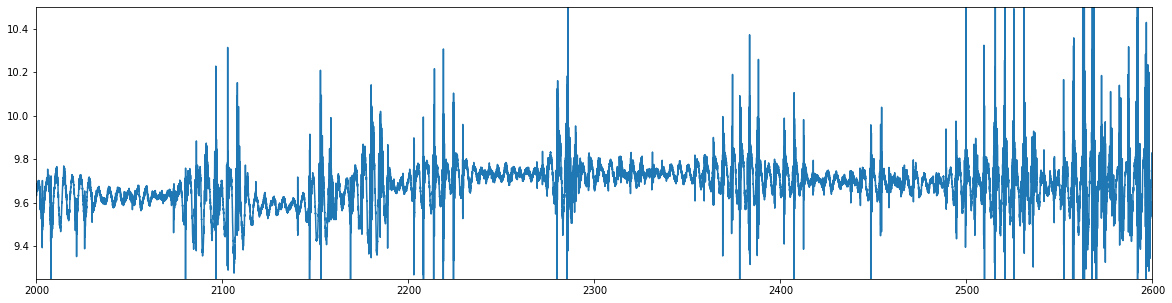

In [83]:
plt.subplots(figsize=(20,5))
#data['a']
plt.plot(data['a']['d'][:,0],data['a']['d'][:,3])
plt.xlim([2000,2600])
plt.ylim([9.25,10.5])

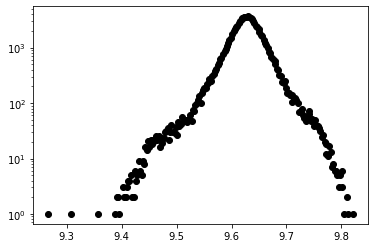

In [79]:
[n,x] = np.histogram(data['a']['d'][:,3][5000:100000],500)

xc = (x[1:]+x[:-1])/2

plt.plot(xc-x0,n,'ko')
plt.yscale('log')


In [12]:
folderlist = glob.glob(folder+'/*/')

data = {}
for fold in folderlist:
    print(fold)
    d,key = phone.read_data(fold)

/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_01_Accelero_Gyro_Magneto_GPS 2024-02-10_19-10-30/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_04_192_168_0_104/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_06_Accelero_Gyro_Magneto_GPS 2024-02-10_18-55-25/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_07_Accelero_Gyro_Magneto_GPS 2022-04-10_11-00-32/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_08_Accelero_Gyro_Magneto_GPS 2024-02-10_18-38-02/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_09_Accelero_Gyro_Magneto_GPS 2024-02-10_18-40-35/
/Users/stephane/Documents/git/icewave/icew